# **T-Maze Active-Inference simulation analysis**

Hello!  
This notebook presents the analysis of the T-Maze Active-Inference simulation results. The simulation models an agent navigating a T-maze environment, governed by the principles of active inference, where the agent balances the need to gather information (epistemic value) against the desire to achieve rewards (pragmatic value).  
In particular, this analysis focuses on the role of three preference parameters—Reward, Punishment and Neutral, and how they shape the agent’s decision-making behavior. The parameters influence the agent's willingness to explore the environment, and getting sure about the context (Which arm is better) versus exploiting available rewards. This notebook explores how adjustments to these parameters impact the outcomes of the simulation.



---


Here I use the data collected from a simulation that ran with different parameter values.  
The simulation explained in a different file.


In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/df_C.csv')

In [3]:
df.count()

,0
Unnamed: 0,2160
Reward_par,2160
Pun_par,2160
Neutral_par,2160
n,2160
Context,2160
N_hints,2160
Chosen_Arm,2160
Outcome,2160
Posterior,2160


In [4]:
df.dtypes
df['Outcome'] = df['Outcome'].astype('category')
df['Context'] = df['Context'].astype('category')

In [5]:
df.describe()

,Unnamed: 0,Reward_par,Pun_par,Neutral_par,n,N_hints,Chosen_Arm,Posterior
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,1079.500000,2.000000,-4.000000,-1.000000,4.500000,0.369907,0.485648,0.907846
std,623.682612,0.683288,0.683288,0.683288,2.872946,0.708397,1.707075,0.211605
min,0.000000,1.000000,-5.000000,-2.000000,0.000000,0.000000,0.000000,0.000976
25%,539.750000,1.400000,-4.600000,-1.600000,2.000000,0.000000,0.000000,0.941176
50%,1079.500000,2.000000,-4.000000,-1.000000,4.500000,0.000000,0.000000,0.999024
75%,1619.250000,2.600000,-3.400000,-0.400000,7.000000,1.000000,0.000000,0.999985
max,2159.000000,3.000000,-3.000000,0.000000,9.000000,6.000000,12.000000,1.000000


In [6]:
df.head(5)

,Unnamed: 0,Reward_par,Pun_par,Neutral_par,n,Context,N_hints,Chosen_Arm,Outcome,Posterior
0,0,1.0,-3.0,0.0,0,Left-Better,3,1,Loss,0.984615
1,1,1.0,-3.0,0.0,1,Left-Better,1,0,Loss,0.984615
2,2,1.0,-3.0,0.0,2,Left-Better,1,0,Reward,0.999024
3,3,1.0,-3.0,0.0,3,Left-Better,1,0,Reward,0.999939
4,4,1.0,-3.0,0.0,4,Left-Better,1,0,Reward,0.999996


In [7]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# **Analysis of the data**

C-Matrix Exploration: The reward, punishment, and neutral parameters of the C-matrix are varied to study their impact on agent behavior.

Reward Parameter: Determines the attractiveness of reaching the correct arm.

Punishment Parameter: Represents the cost of choosing the wrong arm.

Neutral Parameter: Encodes the "urgency" for the agent to choose an arm.  
A higher neutral value makes the agent feel less urgency, possibly leading it to gather more information at the hint location, while a more negative value increases urgency, pushing the agent to choose an arm sooner, even with uncertainty.

## Analysis of number of hints taken

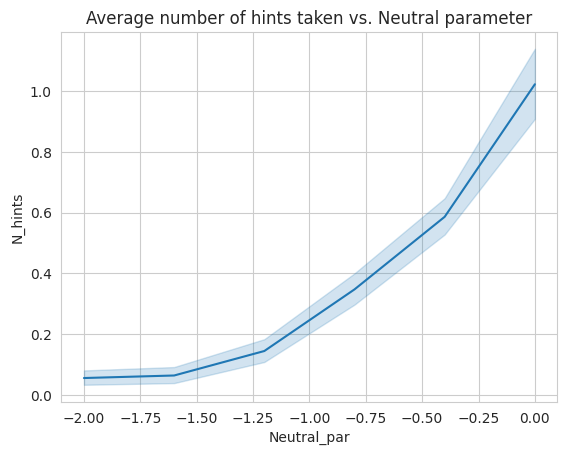

In [8]:
sns.set_style('whitegrid')
sns.lineplot(x='Neutral_par', y='N_hints', data=df)
plt.title('Average number of hints taken vs. Neutral parameter')

plt.show()

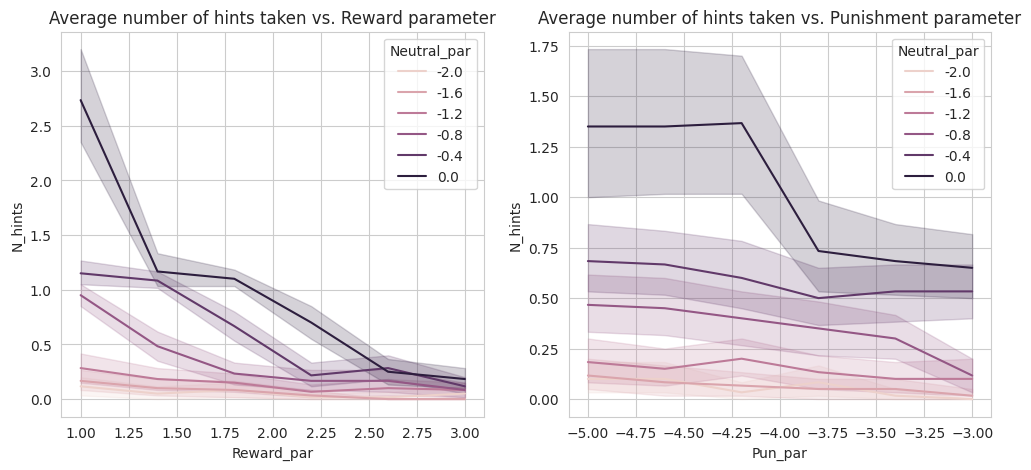

In [12]:
sns.set_style('whitegrid')
ax, fig = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(x='Reward_par', y='N_hints',hue = 'Neutral_par', data=df, ax=fig[0])
sns.lineplot(x='Pun_par', y='N_hints',hue = 'Neutral_par', data=df, ax=fig[1])
fig[0].set_title('Average number of hints taken vs. Reward parameter')
fig[1].set_title('Average number of hints taken vs. Punishment parameter')
plt.show()

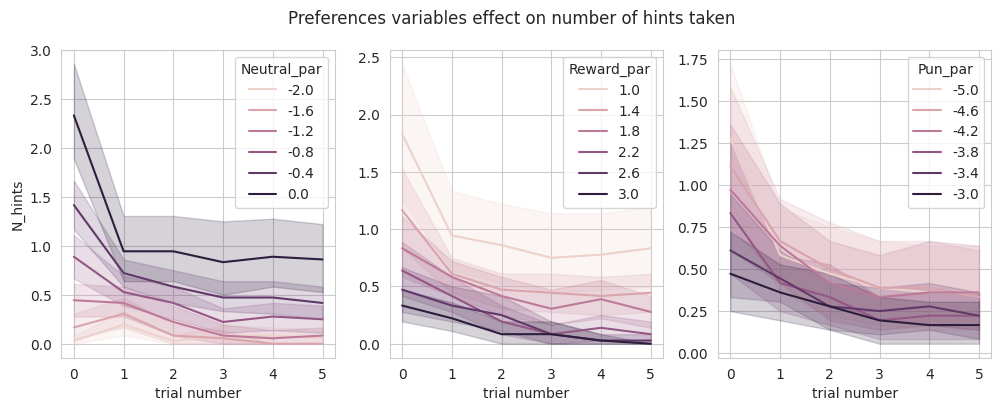

In [13]:
fig, ax = plt.subplots(1,3,figsize=(12, 4))
plt.suptitle('Preferences variables effect on number of hints taken')

sns.lineplot(x='n', y = 'N_hints', hue = 'Neutral_par', data = df[df['n'] < 6], ax = ax[0])
sns.lineplot(x='n', y = 'N_hints', hue = 'Reward_par', data = df[df['n'] < 6], ax = ax[1])
sns.lineplot(x='n', y = 'N_hints', hue = 'Pun_par', data = df[df['n'] < 6], ax = ax[2])
ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xlabel('trial number')
ax[2].set_xlabel('trial number')
ax[1].set_xlabel('trial number')

plt.show()

There are some interesting results here.  

---


**Neutral parameter:** It is visible that for higher (closer to 0) neutral values, make the agent take more hints, and not hurry up about getting to the rewarding arm. It can be interpreted as the agent doesn't 'feel' urgency to get to an arm, so it focuses on enhancing it's epistemic value.  
**Reward parameter:** Regarding the Reward variable, higher reward made the agent more pragmatic, taking less hints and going faster to one of the arms, when it is less sure about the probability of the outcome.  
**Punishment parameter:**  a lower punishment value (more negative value), resulted in the agent taking more hints and "getting sure about the right arm".


Maybe this is because of the spesific values I chose for each one of the variables. Further exa

In [14]:
df.Chosen_Arm.value_counts()

,count
Chosen_Arm,
0,1884
4,122
1,89
3,32
12,31
2,2


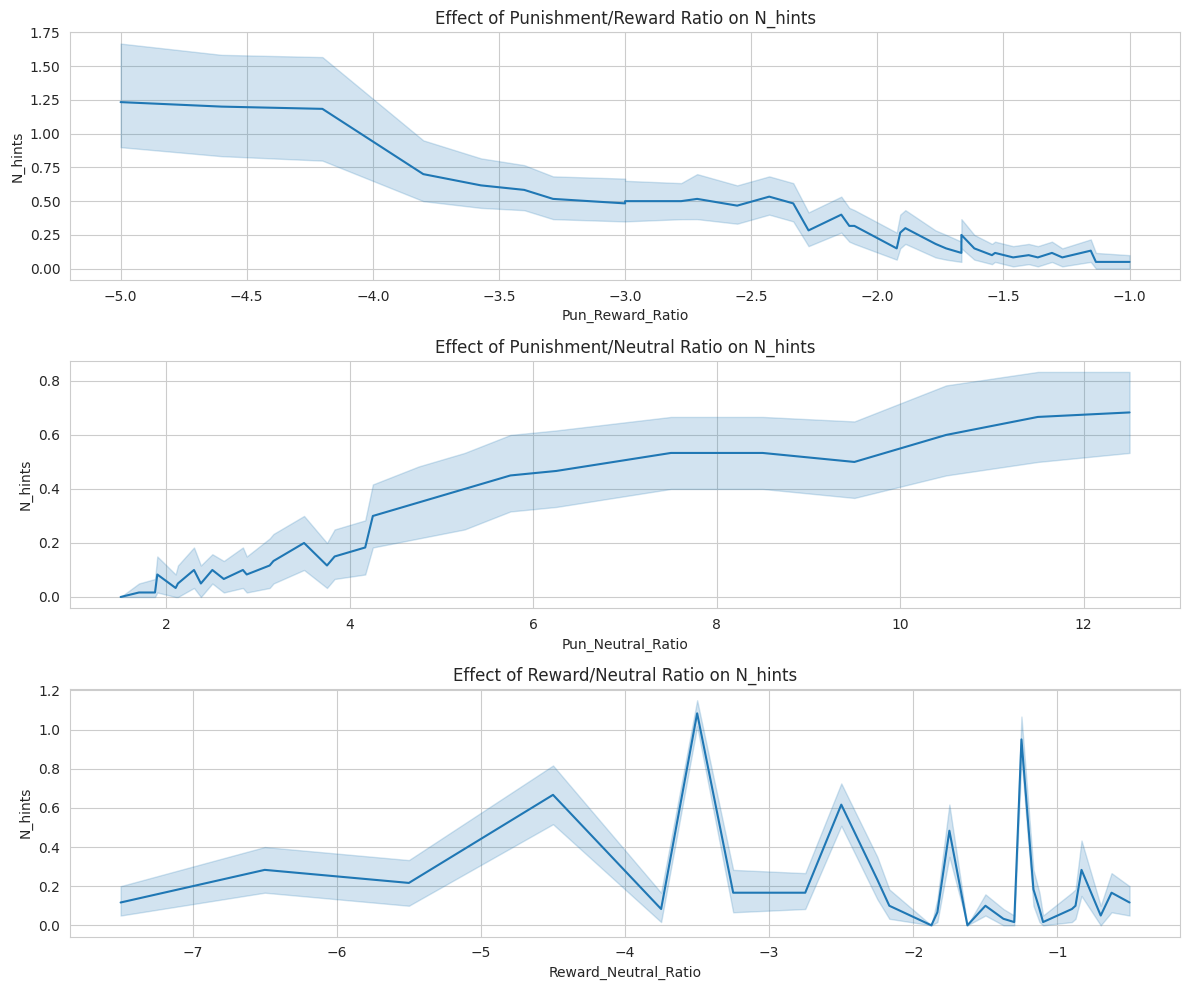

In [27]:
## Examine the number of observation for the ratios between the variables.
# Calculate ratios
df['Pun_Reward_Ratio'] = df['Pun_par'] / df['Reward_par']
df['Pun_Neutral_Ratio'] = df['Pun_par'] / df['Neutral_par']
df['Reward_Neutral_Ratio'] = df['Reward_par'] / df['Neutral_par']


fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Plot the effect of each ratio on N_hints
sns.lineplot(x='Pun_Reward_Ratio', y='N_hints', data=df, ax=axes[0])
axes[0].set_title('Effect of Punishment/Reward Ratio on N_hints')

sns.lineplot(x='Pun_Neutral_Ratio', y='N_hints', data=df, ax=axes[1])
axes[1].set_title('Effect of Punishment/Neutral Ratio on N_hints')

sns.lineplot(x='Reward_Neutral_Ratio', y='N_hints', data=df, ax=axes[2])
axes[2].set_title('Effect of Reward/Neutral Ratio on N_hints')

plt.tight_layout()
plt.show()

The Result here look bit misleading, however general trends are visible.  
Looks like there are more observations from spesific ratio values for each ratio. It happened due to the values I used for each variable:

reward_pars = [1.0, 1.4, 1.8, 2.2, 2.6, 3.0]  
pun_pars = [-3.0, -3.4, -3.8, -4.2, -4.6, -5.0]  
neutral_pars = [0.0, -0.4, -0.8, -1.2, -1.6, -2.0]

We will see it in the next cell.

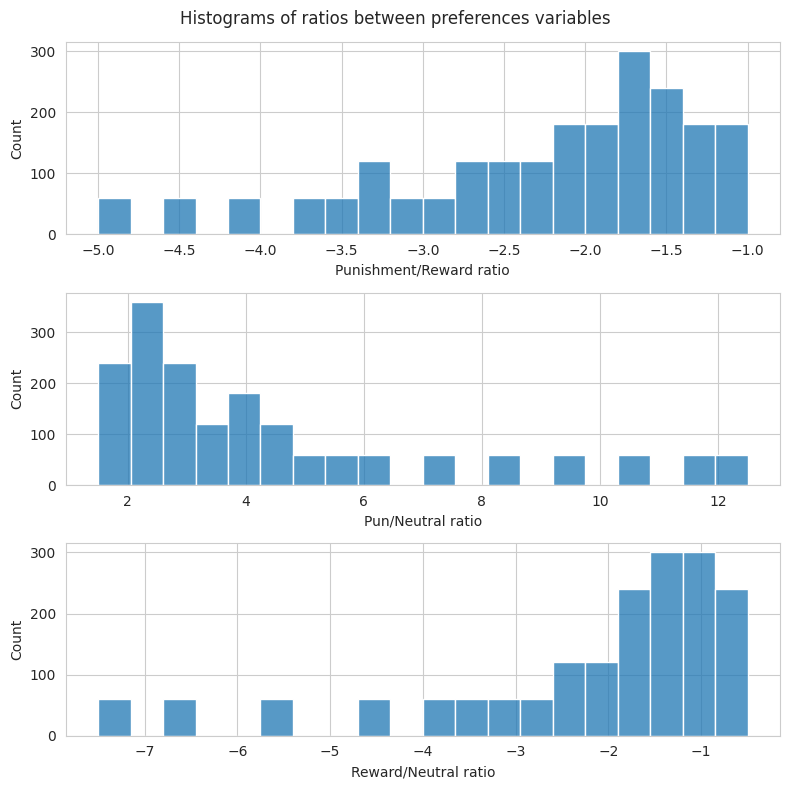

In [16]:
# Plot histograms of different ratios
fig, ax = plt.subplots(3,1,figsize=(8,8))
sns.set_style('whitegrid')
plt.suptitle('Histograms of ratios between preferences variables')


sns.histplot(data=df, x='Pun_Reward_Ratio', bins = 20, ax = ax[0])
sns.histplot(data=df, x='Pun_Neutral_Ratio', bins = 20, ax = ax[1])
sns.histplot(data=df, x='Reward_Neutral_Ratio', bins = 20, ax = ax[2])
ax[0].set_xlabel('Punishment/Reward ratio')
ax[1].set_xlabel('Pun/Neutral ratio')
ax[2].set_xlabel('Reward/Neutral ratio')

plt.tight_layout()

plt.show()

It is indeed looks like some ratios are less frequent than others. Because of that, I will also need to examine spesifically the ratios that are more frequent for more confidence in the results. However, the large ratios are very interesting because there we should see more special dynamics.

## **Outcome analysis**  

Here I will focus on the outcomes, meaning the effect of the variables in interest on the outcomes and the effect of the outcomes on the behavior.

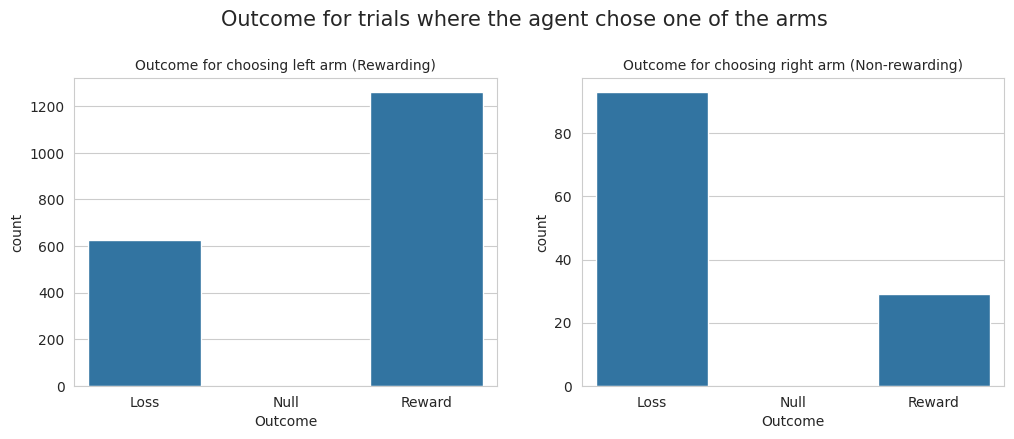

In [17]:
fig, ax = plt.subplots(1,2,figsize=(12, 4))
plt.suptitle('Outcome for trials where the agent chose one of the arms',
             x = 0.5, y= 1.05, size =  15)


# Only for the times the agent reached one of the arms
sns.countplot(x='Outcome', data=df[df['Chosen_Arm'] == 0], ax = ax[0])
ax[0].set_title('Outcome for choosing left arm (Rewarding)',size =10)
sns.countplot(x='Outcome', data=df[df['Chosen_Arm'] == 4], ax = ax[1])
ax[1].set_title('Outcome for choosing right arm (Non-rewarding)',size =10)
plt.show()

The results are consistent with the parameters I chose, which are p_reward =  0.7  
Next, I will analyze the relationship between the parameters and the outcomes.

### Variables effect on the outcome

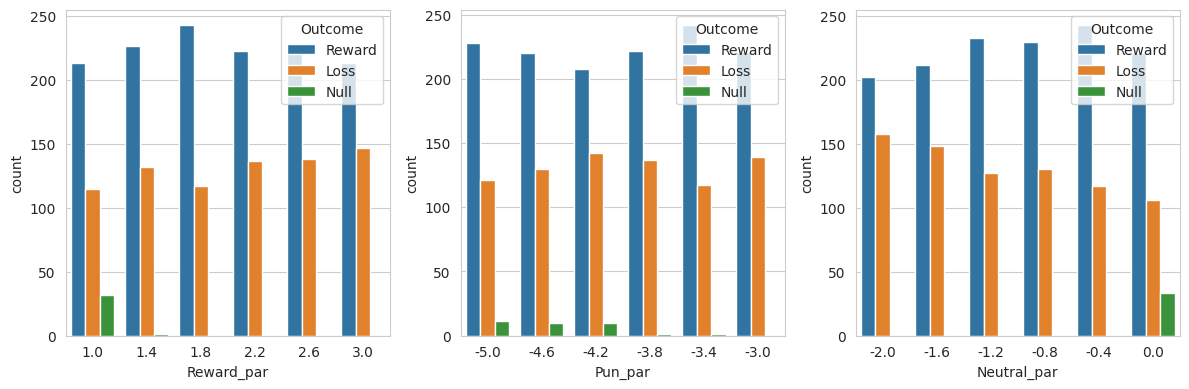

In [18]:
fig, axes = plt.subplots(1,3,figsize=(12, 4))

hue_order = ['Reward', 'Loss', 'Null']
sns.countplot(x='Reward_par', hue='Outcome', data = df, ax = axes[0], hue_order=hue_order)
sns.countplot(x='Pun_par', hue='Outcome', data = df, ax = axes[1], hue_order=hue_order)
sns.countplot(x='Neutral_par', hue='Outcome', data = df, ax = axes[2], hue_order=hue_order)

plt.tight_layout()

Here, Some interesting relationships are visible.  
We can see that when the reward variable is too low, there are more Null results, meaning the agent didn't get to one of the arms. It means, it probably took more hints, or didn't 'feel' like choosing before it sure, because the reward is not that rewarding.

Similarily, when the punishment variable is too negative, There are mor Null outcomes, meaning the agent took more hints, and didn't want to take risks.

Finally, when the neutral variable was 0, there were more Null results, meaning also that the agent didn't feel a need to move somewhere and to choose between the arms.

---

Next, I will examine the dynamics between couples of 2 variables, and it's effect on the outcome

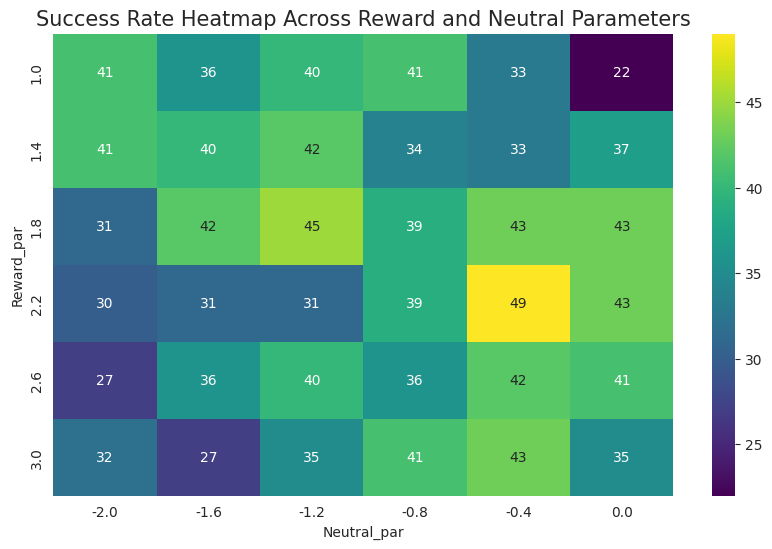

In [19]:
# Create a pivot table to summarize the success rate (e.g., when Outcome = "Reward")
# For the Reward and Neutral parameters

pivot_table_reward_neutral = df[df['Outcome'] == 'Reward'].pivot_table(
    values='n',
    index='Reward_par',
    columns='Neutral_par',
    aggfunc='count')

# Plot heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(pivot_table_reward_neutral, annot=True, cmap='viridis', cbar=True)
plt.title('Success Rate Heatmap Across Reward and Neutral Parameters', loc = 'Center', size = 15)
plt.show()

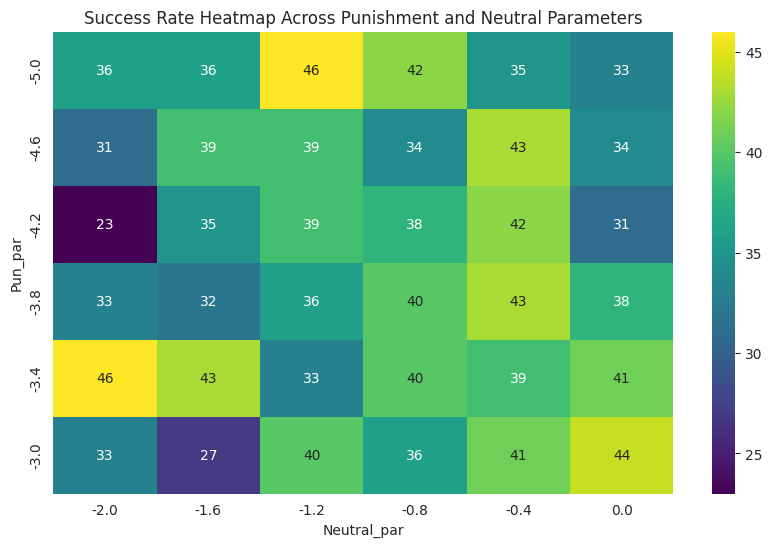

In [20]:
# Create a pivot table to summarize the success rate (e.g., when Outcome = "Reward")
# For the Punishment and Neutral parameters

pivot_table_pun_neutral = df[df['Outcome'] == 'Reward'].pivot_table(
    values='n',
    index='Pun_par',
    columns='Neutral_par',
    aggfunc='count')

# Plot heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(pivot_table_pun_neutral, annot=True, cmap='viridis', cbar=True)
plt.title('Success Rate Heatmap Across Punishment and Neutral Parameters')
plt.show()

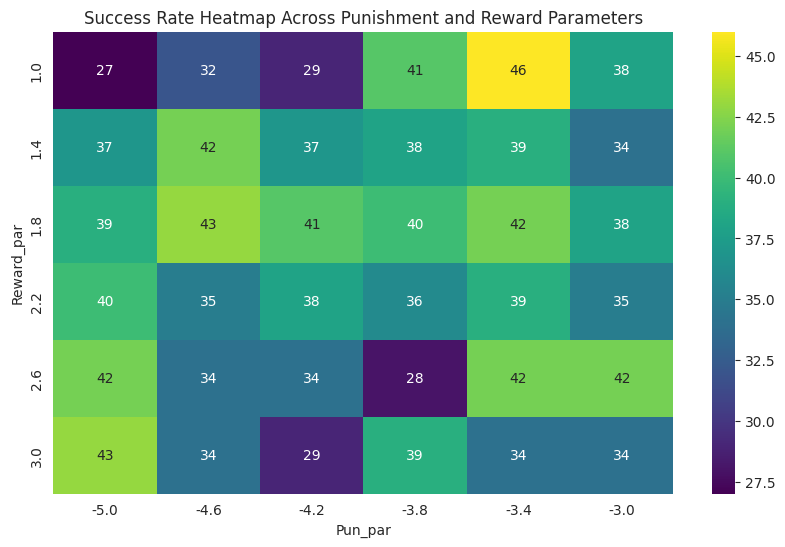

In [21]:
# Create a pivot table to summarize the success rate (e.g., when Outcome = "Reward")
# For the Reward and Punishment parameters

pivot_table_reward_Pun = df[df['Outcome'] == 'Reward'].pivot_table(
    values='n',
    index='Reward_par',
    columns='Pun_par',
    aggfunc='count')

# Plot heatmap
plt.figure(figsize=(10, 6))

sns.heatmap(pivot_table_reward_Pun, annot=True, cmap='viridis', cbar=True)
plt.title('Success Rate Heatmap Across Punishment and Reward Parameters')
plt.show()

It's not clear from the heatmaps, if there is a significant trend regarding the combinations. However, we saw in previous graphs, when we examined the ratios between the parameters and their affect on the number of hints taken, that there is a correlation between Pun/Reward ratio and number of hints taken and between Pun/Neutral ratio and number of hints taken.



## First trial outcome effect on second trial behavior

In [34]:
# Creating a dataframe that consists of the 2nd trials in each combination of parameters
df_second = df.copy()
# adding the outcome of the previous trial (The first trial for each combination)
df_second['Previous_trial_outcome'] = df['Outcome'].shift(1)
df_second = df_second[df['n'] == 2]

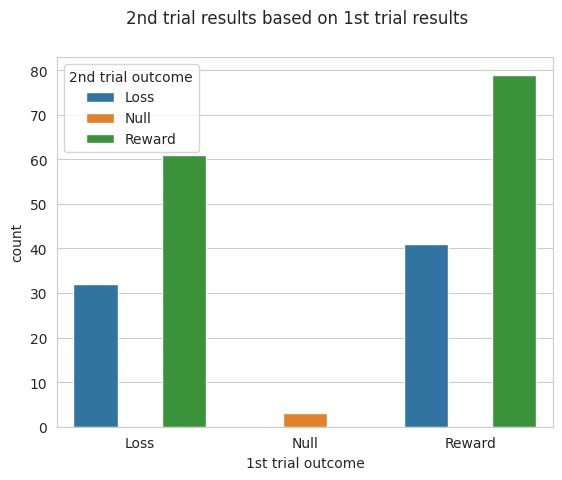

In [35]:
sns.countplot(x='Previous_trial_outcome', hue= 'Outcome', data=df_second)
plt.suptitle('2nd trial results based on 1st trial results')
plt.xlabel('1st trial outcome')
plt.legend(title='2nd trial outcome')
plt.show()

It looks like the outcome of the first trial doesn't affect the outcome of the second trial.  
The differences between the Reward and Loss counts are because the agent was right most of the times and received reward. However, the proportions within each category (Loss and Reward in the 1st trial) in the second round outcomes are similar among the categories.  
The Null values probably represent trials where the neutral variable is 0 or close to it, so the agent stays in the cue location for maximizing epistemic value.

In [88]:
## Creating a df without trial of Null outcome (Where the agent didn't reach one of the arms)

df_filtered = df_second[(df_second['Outcome'] != 'Null') & (df_second['Previous_trial_outcome'] != 'Null')]
df_filtered['Outcome'] = df_filtered['Outcome'].cat.remove_unused_categories()
df_filtered['Previous_trial_outcome'] = df_filtered['Previous_trial_outcome'].cat.remove_unused_categories()

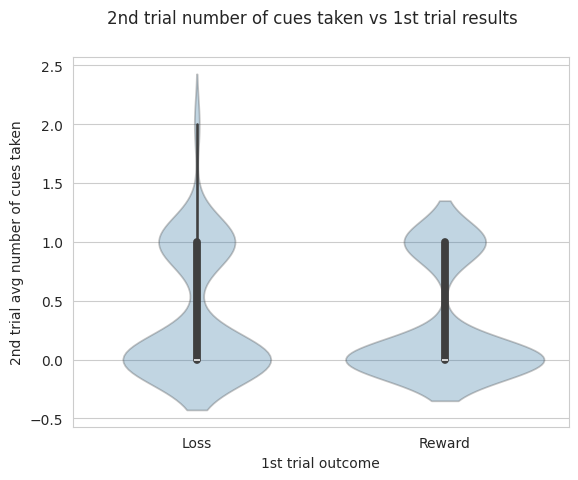

In [84]:
sns.violinplot(x='Previous_trial_outcome', y= 'N_hints', data=df_filtered,
              alpha = 0.3)
plt.suptitle('2nd trial number of cues taken vs 1st trial results')
plt.xlabel('1st trial outcome')
plt.ylabel('2nd trial avg number of cues taken')
plt.show()

As expected, on the 2nd trials after a loss on the first trial, the agent took on average more cues to learn the context better.

## **Belief analysis**

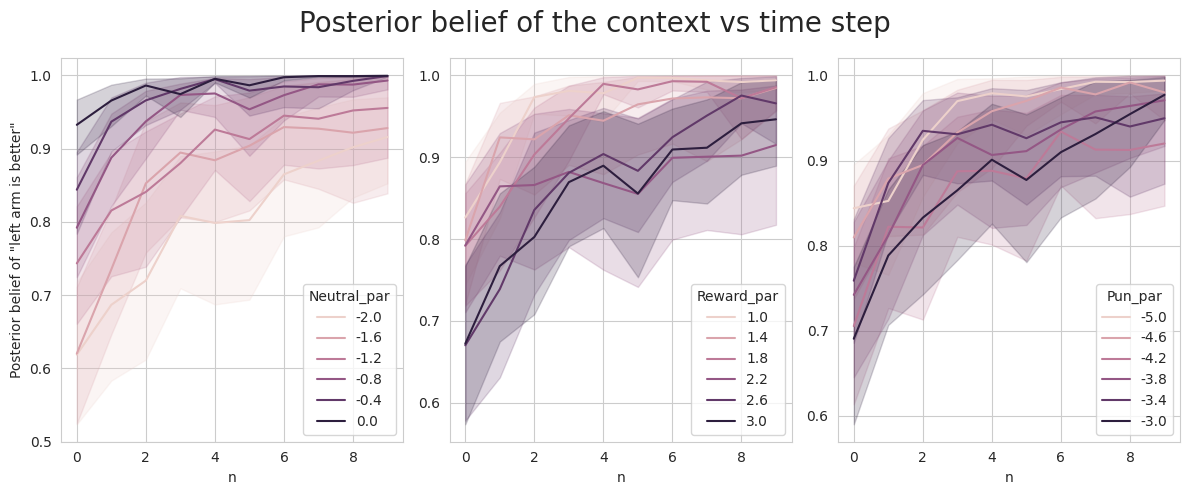

In [28]:
fix, ax = plt.subplots(1,3,figsize=(12, 5))
plt.suptitle('Posterior belief of the context vs time step', size = 20)


sns.lineplot(x='n', y='Posterior',hue = 'Neutral_par', data=df, ax = ax[0])
sns.lineplot(x='n', y='Posterior',hue = 'Reward_par', data=df, ax = ax[1])
ax[1].set_ylabel('')
sns.lineplot(x='n', y='Posterior',hue = 'Pun_par', data=df, ax = ax[2])
ax[2].set_ylabel('')
ax[0].set_ylabel('Posterior belief of "left arm is better"')

plt.tight_layout()
plt.show()

In these graphs we can see how the effects from a different angle. The posterior here represents the focus of the agent on the epistemic value vs. the pragmatic value.  
As the posterior is higher, it means that the agent took more hints, or got more right decisions (Choosing the left arm) on average.  
Combining these results with the previous analysis, it's probably the first option, because we already saw the number of hints taken vs the parameters.

## Belief update as result of first trial outcome

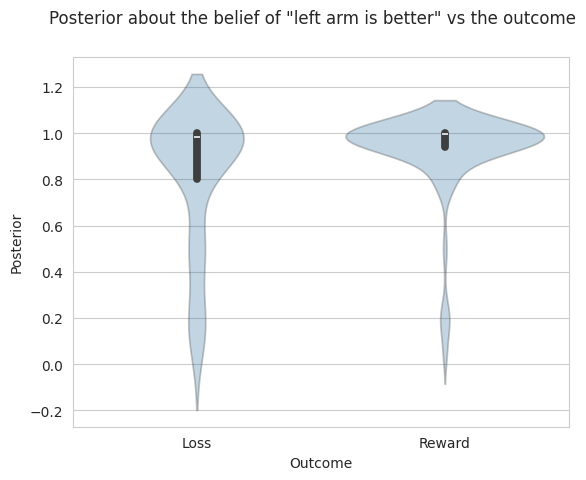

In [87]:
sns.violinplot(x='Outcome', y= 'Posterior', data=df_filtered,
              alpha = 0.3)
plt.suptitle('Posterior about the belief of "left arm is better" vs the outcome')
plt.show()

As expected, we can see here that the a lossfusing the agent, making him less sure about the context.

# Conclusion

The analysis demonstrates the significant influence of the preference parameters on the agent’s behavior. By modulating the Reward, Punishment and Neutral parameters, we observe shifts in the agent’s tendency towards exploration (gathering information) or exploitation (seeking rewards). These results highlight the nuanced dynamics between epistemic and pragmatic value, showing that different parameter settings can lead to divergent strategies. This analysis offers valuable insights into how active inference agents balance uncertainty and reward, paving the way for further exploration of parameter tuning in complex decision-making scenarios.